## Rozpoznawanie cyfr i zbiór MNIST

Baza MNIST zawiera cyfry napisanych ręcznie przez urzedników American Census Bureau i studentów.
- 60 tysięcy w zestawie treningowym\
- 10 tysięcy w zestawie testowym

Obrazki są przeskalowane do 28x28 pikseli i zapisane jaki plik cvs. Mała próbka poniżej.

<img src='MnistExamples.png' />


In [1]:
import numpy
# scipy.special expit() to funkcja sigmoid ale w odniesieniu do macierzy (ndarray)
import scipy.special
# biblioteka do wizualizacji danych + komenda ktora wyswietla jej rezultaty w oknie naszego notebooka
import matplotlib.pyplot
%matplotlib inline

# klasa tworzaca sieć neuronową
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # ustalamy ilosc neuronow w warstwie wejsciowej, ukrytej i wyjsciowej
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes

        # inicjalizujemy wagi: input_wagi and hidden_wagi
        # input_wagi(od inputu do warstwy ukrytej) hidden_wagi od warstwy ukrytej do outputu (odpowiedzi)
        self.input_wagi = numpy.random.normal(0.0, pow(self.inputnodes, -0.5), (self.hiddennodes, self.inputnodes))
        self.hidden_wagi = numpy.random.normal(0.0, pow(self.hiddennodes, -0.5), (self.outputnodes, self.hiddennodes))

        # szybkość uczenia
        self.lr = learningrate

        # funkcja aktywacyjna (sigmoid), scipy.special.expit() to implementacja sigmoid do macierzy
        self.activation_function = lambda x: scipy.special.expit(x)


    # funkcja treningu 
    def train(self, inputs_list, targets_list):
        # zmieniamy dane wejsciowe na macierze 2d
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # obliczamy sygnaly plynace od danych wejsciowych do warstwy ukrytej 
        hidden_inputs = numpy.dot(self.input_wagi, inputs)
        # obliczamy aktywacje warstwy ukrytej
        hidden_outputs = self.activation_function(hidden_inputs)

        # obliczamy sygnaly plynace od warstwy ukrytej do warstwy wyjsciowej
        final_inputs = numpy.dot(self.hidden_wagi, hidden_outputs)
        # obliczamy odpowiedz sieci (warsta wyjsciowa)
        final_outputs = self.activation_function(final_inputs)

        # obliczamy blad odpowiedzi (target - actual)
        output_errors = targets - final_outputs
        # obliczamy blad warstwy ukrytej: output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.hidden_wagi.T, output_errors)

        # zmieniamy wagi warstwy ukrytej o blad * szybkosc uczenia (lr, learningrate)
        self.hidden_wagi += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # zmieniamy wagi warstwy ukrytej o blad warstwy ukrytej * szybkosc uczenia (lr, learningrate)
        self.input_wagi += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    # testujemy odpowiedzi sieci
    def query(self, inputs_list):
        # zmieniamy input do postaci maciezy 2d
        inputs = numpy.array(inputs_list, ndmin=2).T

        # liczymy dane wejsciowe do warstwy ukrytej
        hidden_inputs = numpy.dot(self.input_wagi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # liczymy dane wejsciowe do ostatniej warstwy
        final_inputs = numpy.dot(self.hidden_wagi, hidden_outputs)
        # odpowiedz sieci
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [2]:
# ustalamy ilosc neuronow w kazdej warstwie (w warstwie wejsciowej ilosc danych (piksele w obrazku*kanaly(RGB) = ilosc wektorow)
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# szybkosc uczenia
learning_rate = 0.1
print('learning rate:', learning_rate)

# inicjalizujemy siec
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# wgrywamy dane treningowe jako liste
training_data_file = open('C:/Users/ajankows/Desktop/python/obrazki_dane/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
print('file ready')
# train the neural networktestujemy odpowiedzi sieci

learning rate: 0.1
file ready


In [3]:
# epoch to jedna epoka czyli jeden przebieg uczenia po wszystkich danych
epochs = 1

for e in range(epochs):
    i=0
    # przechodzimy przez wszystkie przypadki w danych treningowych
    for record in training_data_list:
        
        i=i+1
         
        # rozdzielamu rekordy w miejscu ',' 
        all_values = record.split(',')
        # skalujemy wartosci pikseli do przedziału 0.1 : 1.01
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # tworzymy plik z odpowiedziami (wszzystkie odpowiedzi 0.1 oprócz prawidłowej która ma wartość 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] zawiera targety 
        targets[int(all_values[0])] = 0.99
        # rozpoczynamy trening
        n.train(inputs, targets)

In [17]:
from imageio import imread
import PIL


# wgrywamy nasz wlasny obrazek
image_file_name = ('C:/Users/ajankows/Desktop/python/obrazki_dane/8.png')

    
# zmieniamy obrazek png na macież
print ("loading ... ", image_file_name)
img_array = imread(image_file_name, flatten=True)



# zmieniamy obrazek 28x28 na liste 784 wartosci, zamieniamy wartosci miejscami
img_data  = 255.0 - img_array.reshape(784)
obrazek=img_data

# skalujemy dane do zakresu 0.01 do 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01

matplotlib.pyplot.imshow(obrazek.reshape(28,28), cmap='Greys', interpolation='None')

loading ...  C:/Users/ajankows/Desktop/python/obrazki_dane/8.png


RuntimeError: Imageio Pillow plugin requires Pillow lib.

In [5]:
import imageio

In [8]:
item=0

# prawidlowa odpowiedz to nazwa pliku bez rozszerzenia (np. 8.png)
correct_label = int(image_file_name[-5])
# przetworzony obrazek jest naszym imputem
inputs = obrazek

# odpytujemy sieć
outputs = n.query(inputs)
print (outputs)

# index onajwyzszej wartosci to odpowiedz sieci
label = numpy.argmax(outputs)
print("network says ", label)
# dolaczamy odpowiedzi do listy
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[0.52513038]
 [0.46576404]
 [0.72937294]
 [0.33497195]
 [0.69791299]
 [0.80366208]
 [0.65714804]
 [0.69889987]
 [0.68613836]
 [0.54249646]]
network says  5
no match!


In [9]:
print(obrazek)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  12.  28.  29.  28.  12.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  15.  63.  66.
 105. 155. 161. 155. 105.  62.   5.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.  29.  55. 129. 225. 225.
 208. 166. 161. 167. 207. 227.  85.  14.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   2.  53. 167. 205. 213. 225. 164.
  65.  31.  29.  31.  47.  87. 190. 118.  15.   0.   0.   0.   0.   0.
   0. 

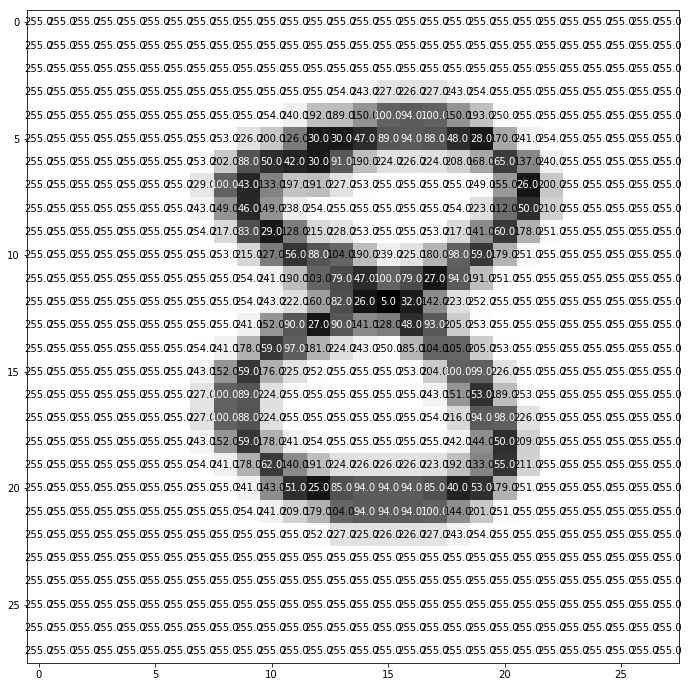

In [11]:
def visualize_input(img, ax):

    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = matplotlib.pyplot.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(img_array, ax)

In [18]:
from PIL import Image


ImportError: DLL load failed: The specified module could not be found.